<a href="https://colab.research.google.com/github/SOORAJ-DSML/supply-chain-management/blob/main/supply_chain_management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
import numpy as np


In [94]:
import pandas as pd

df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/supply_train.csv')

In [95]:
df

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,...,1,112,25.0,2009.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,16615,WH_116615,EID_66615,Urban,Large,West,Zone 6,3,1,6,...,0,240,19.0,2009.0,14,0,B+,5,23,16094
16616,16616,WH_116616,EID_66616,Urban,Large,North,Zone 5,2,0,2,...,1,164,30.0,NaN,17,0,B+,6,24,21113
16617,16617,WH_116617,EID_66617,Rural,Large,North,Zone 6,5,0,4,...,1,211,24.0,2003.0,24,1,B,5,29,28117
16618,16618,WH_116618,EID_66618,Rural,Small,West,Zone 6,3,2,3,...,1,119,NaN,2007.0,16,0,A,5,15,21103


In [96]:
# Check for duplicates
df.duplicated().sum()

0

In [97]:
df.isna().sum()

Unnamed: 0                         0
Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      667
wh_est_year                     7860
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     599
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

In [98]:
# Fill the 'wh_est_year' with the mean
df['wh_est_year'].fillna(value =df['wh_est_year'].mean(),inplace=True)

In [99]:
# Fill the 'approved_wh_govt_certificate' with the most frequent value
df['approved_wh_govt_certificate'].fillna(value='C',inplace=True)

In [100]:
# Fill the 'workers_num' with the mean
df['workers_num'].fillna(value =df['workers_num'].mean(),inplace=True)

In [101]:
# Check for missing values
df.isna().sum()

Unnamed: 0                      0
Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [102]:
#delete unwanted columns
df = df.drop(columns = ['Ware_house_ID', 'WH_Manager_ID'])

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation

<ipython-input-104-73a5e7325c46>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


(17.5, -0.5)

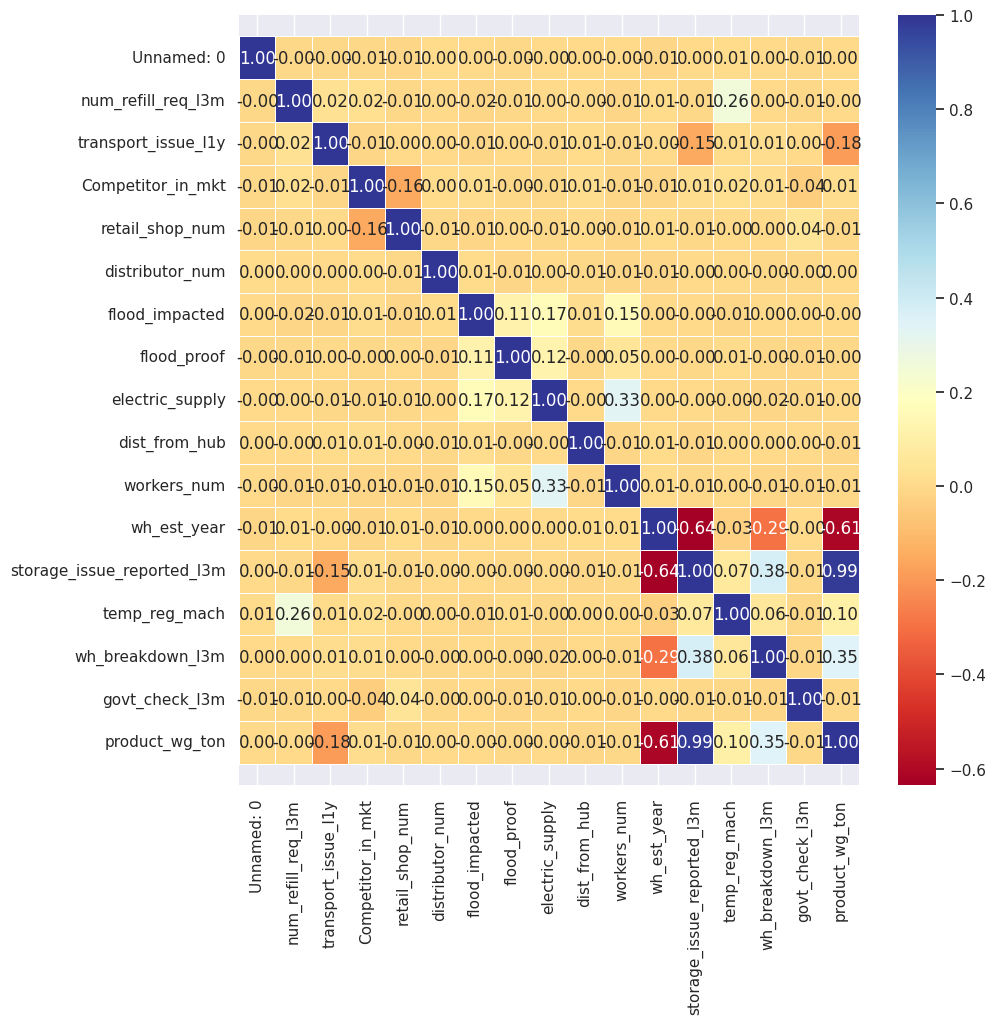

In [104]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="RdYlBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<ipython-input-48-030508f39316>:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.drop('product_wg_ton', axis=1).corrwith(df.product_wg_ton).plot(kind='bar', grid=True, figsize=(12, 8),


<Axes: title={'center': 'Correlation with target'}>

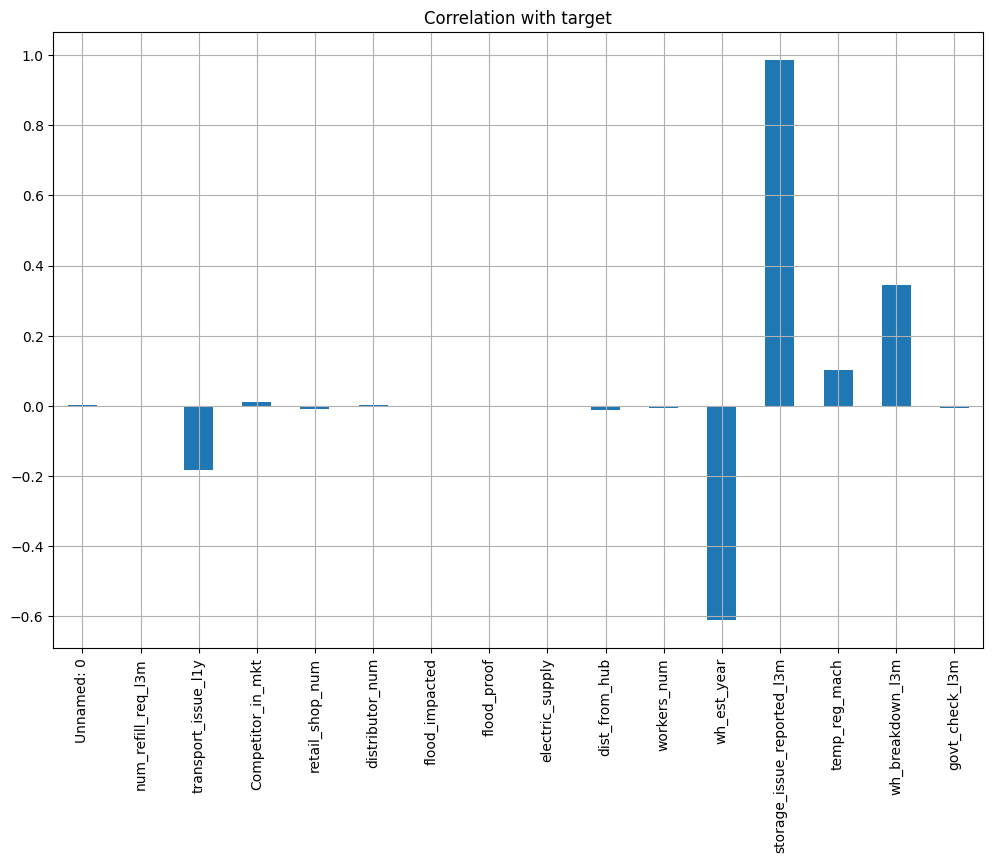

In [ ]:
# Check the correlations
df.drop('product_wg_ton', axis=1).corrwith(df.product_wg_ton).plot(kind='bar', grid=True, figsize=(12, 8),
                                                   title="Correlation with target")

<ipython-input-45-a2c156471c80>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Location_type',palette=['blue','yellow'])


Text(0.5, 1.0, 'Location_type Distribution')

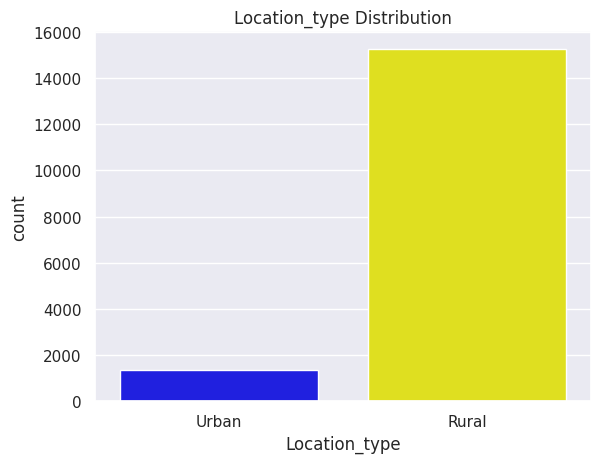

In [45]:
sns.countplot(data=df, x='Location_type',palette=['blue','yellow'])
plt.title(f'Location_type Distribution')

<ipython-input-44-0879eedc01a5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x="temp_reg_mach",y="product_wg_ton",palette=['red','green'])


<Axes: xlabel='temp_reg_mach', ylabel='product_wg_ton'>

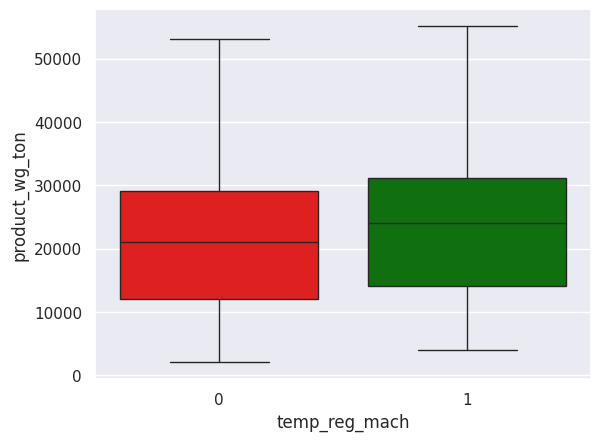

In [44]:
sns.boxplot(data=df,x="temp_reg_mach",y="product_wg_ton",palette=['red','green'])

In [19]:
total_weight = df['product_wg_ton'].sum()

# Calculate percentages
df['percentage'] = (df['product_wg_ton'] / total_weight) * 100


x = df.groupby('zone')['percentage'].sum()

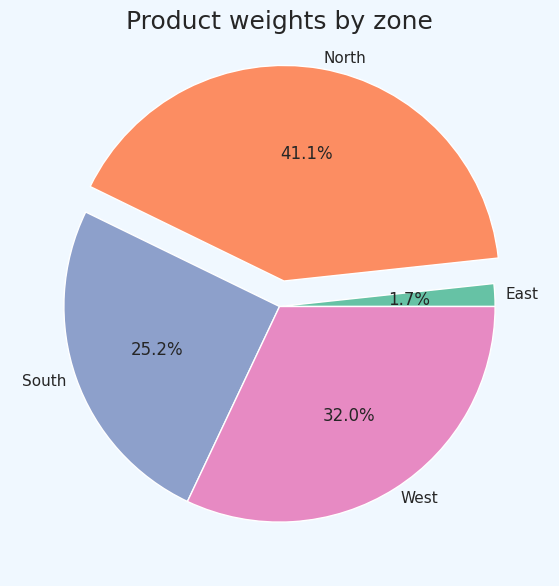

In [23]:

labels = ['East', 'North', 'South', 'West']
sns.set(font_scale = 1)
fig, ax = plt.subplots(figsize=(8, 7), facecolor='aliceblue')
ax.pie(x, labels=labels,
       autopct='%1.1f%%',
       colors=sns.color_palette('Set2'),
       labeldistance=1.05,
       # Add space around only one slice
       explode=[0, 0.12, 0, 0])
plt.title('Product weights by zone', fontsize=18)
plt.show()

<ipython-input-43-6029b770c18c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='WH_capacity_size', data=df, palette=['green', 'red', 'yellow']).set(title="Warehouse")


[Text(0.5, 1.0, 'Warehouse')]

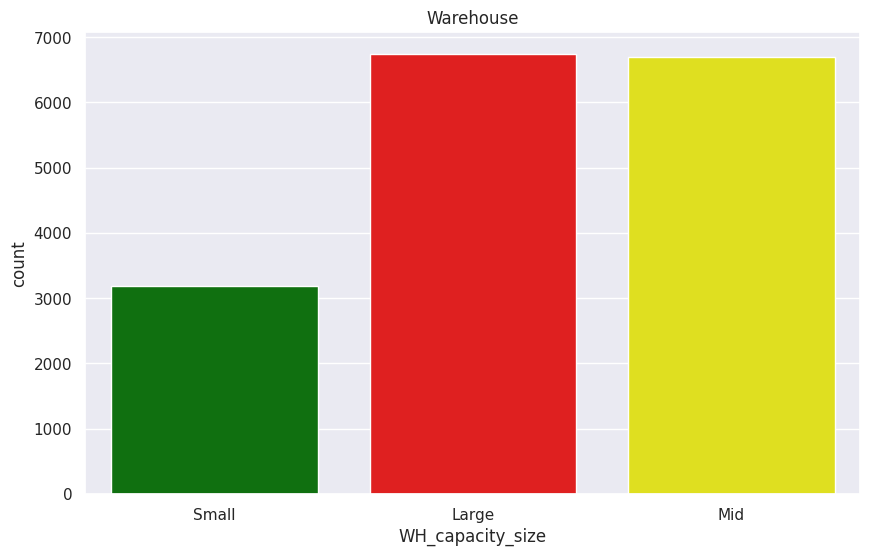

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(x='WH_capacity_size', data=df, palette=['green', 'red', 'yellow']).set(title="Warehouse")

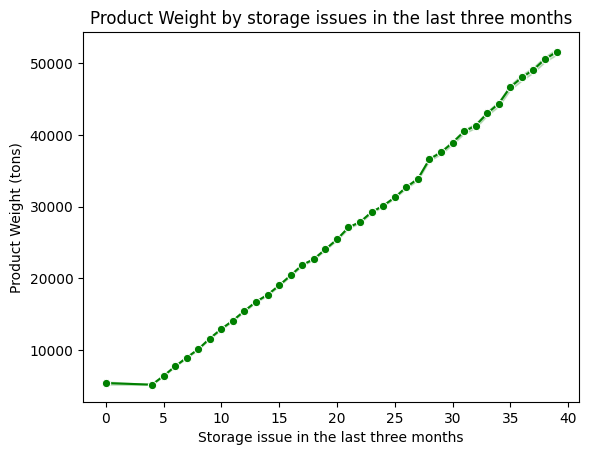

In [ ]:

sns.lineplot(data=df, x='storage_issue_reported_l3m', y='product_wg_ton', color='green', marker='o')
plt.xlabel('Storage issue in the last three months')
plt.ylabel('Product Weight (tons)')
plt.title('Product Weight by storage issues in the last three months')
plt.show()

Data preprocessing

In [115]:
X = df.drop(columns='product_wg_ton')
y = df['product_wg_ton']

In [116]:

from sklearn.preprocessing import LabelEncoder
# Create an instance of LabelEncoder
le = LabelEncoder()

df['Location_type'] = le.fit_transform(df['Location_type'])
df['WH_capacity_size'] = le.fit_transform(df['WH_capacity_size'])
df['approved_wh_govt_certificate'] = le.fit_transform(df['approved_wh_govt_certificate'])
df['zone'] = le.fit_transform(df['zone'])
df['WH_regional_zone'] = le.fit_transform(df['WH_regional_zone'])
df['wh_owner_type'] = le.fit_transform(df['wh_owner_type'])

In [117]:
from sklearn.model_selection import train_test_split
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

LINEAR REGRESSION

In [143]:
# creating the model
# feeding the training data to the model
# predicting the test set results
# calculating the mean squared error
# Calculating the r2 score

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split,cross_val_score
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
MSE1= mean_squared_error(y_test,y_pred)
r21=r2_score(y_test,y_pred)
mae1 = mean_absolute_error(y_test,y_pred)
print('MAE:',mae1)
print('MSE:',MSE1)
print('r2_score:',r21)

MAE: 1270.0570122058266
MSE: 3052431.0699358033
r2_score: 0.9775216798071905


SUPPORT VECTOR MECHINE

In [145]:
# creating the model
# feeding the training data to the model
# predicting the test set results
# calculating the mean squared error
# Calculating the r2 score
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
scalar=StandardScaler()
x_train_scaled=scalar.fit_transform(X_train)
X_test_scaled=scalar.transform(X_test)
model=SVR(kernel='linear')
model.fit(X_train_scaled,y_train)
y_pred=model.predict(X_test_scaled)
MSE2= mean_squared_error(y_test,y_pred)
r22=r2_score(y_test,y_pred)
mae2 = mean_absolute_error(y_test,y_pred)
print('MAE:',mae2)
print('MSE:',MSE2)
print('r2_score:',r22)


MAE: 2576.8201996566468
MSE: 11093384.17663254
r2_score: 0.9183075273999761


XGBREGRESSOR

In [146]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train, y_train)

# Evaluate XGBoost model
y_pred = model.predict(X_test)
MSE3 = mean_squared_error(y_test, y_pred)
r23 = r2_score(y_test, y_pred)
mae3 = mean_absolute_error(y_test,y_pred)
print('MAE:',mae3)
print('MSE:',MSE3)
print('r2_score:',r23)

MAE: 659.7994383296668
MSE: 790191.2786292969
r2_score: 0.9941809750432895


DECISION TREE

In [147]:
# creating the model
# feeding the training data to the model
# predicting the test set results
# calculating the mean squared error
# Calculating the r2 score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score
model=DecisionTreeRegressor(random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
MSE4= mean_squared_error(y_test,y_pred)
r24=r2_score(y_test,y_pred)
mae4 = mean_absolute_error(y_test,y_pred)
print('MAE:',mae4)
print('MSE:',MSE4)
print('r2_score:',r24)

MAE: 851.6095066185319
MSE: 1685599.0649819495
r2_score: 0.9875871282164084


RANDOM FOREST

In [148]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score
model=RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
MSE5= mean_squared_error(y_test,y_pred)
r25=r2_score(y_test,y_pred)
mae5 = mean_absolute_error(y_test,y_pred)
print('MAE:',mae5)
print('r2_score:',r25)
print('MSE:',MSE5)

MAE: 683.0226113116727
MSE: 847696.0446613719
r2_score: 0.9937575058432107


In [156]:
from sklearn.neural_network import MLPRegressor
neural_network_model = MLPRegressor(max_iter=1000)
neural_network_model.fit(X_train, y_train)

# Evaluate Neural Network model
y_pred = model.predict(X_test)
MSE6 = mean_squared_error(y_test,y_pred)
r26 = r2_score(y_test,y_pred)
mae6= mean_absolute_error(y_test,y_pred)
print('MAE:',mae6)
print('r2_score:',r26)
print('MSE:',MSE6)

MAE: 683.0226113116727
r2_score: 0.9937575058432107
MSE: 847696.0446613719


In [158]:
compare = pd.DataFrame({'Model': ['Linear Regression', 'SVM','XGBregressor',
                                   'Decision Tree', 'Random Forest','NN'],
                        'MSE': [MSE1,MSE2,MSE3,MSE4,MSE5,MSE6],
                        'MAS':[mae1,mae2,mae3,mae4,mae5,mae6],
                        'R2_SCORE':[r21,r22,r23,r24,r25,r26]})
compare

,Model,MSE,MAS,R2_SCORE
0,Linear Regression,3.052431e+06,1270.057012,0.977522
1,SVM,1.109338e+07,2576.820200,0.918308
2,XGBregressor,7.901913e+05,659.799438,0.994181
3,Decision Tree,1.685599e+06,851.609507,0.987587
4,Random Forest,8.476960e+05,683.022611,0.993758
5,NN,8.476960e+05,683.022611,0.993758


Model choice:
The best model is the Gradiant Boosting Regressor because it has the highest R2_score and the lowest mean_absolute_error, mean_squared_error and root_mean_squared_error without overfitting